In [498]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [480]:
#np.savez('models_21cm.npz', models=anl.get_blob_from_disk('dTb')[~exclude],
#          freqs=freqs)

In [481]:
models_21cm = np.load('models_21cm.npz')
dTb = models_21cm['models'].T
freqs=models_21cm['freqs']

Text(0.5, 0, '$\\nu$ [GHz]')

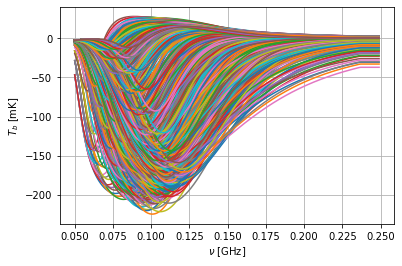

In [482]:
for model in dTb.T:
    plt.plot(freqs, model)
plt.grid()
plt.ylabel('$T_b$ [mK]')
plt.xlabel('$\\nu$ [GHz]')

In [483]:
cov_21cm = np.cov(dTb)

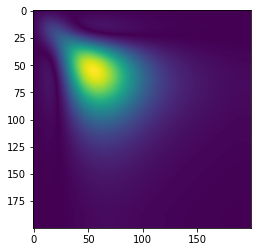

In [484]:
plt.imshow(np.abs(cov_21cm))

In [485]:
evals_21cm, evecs_21cm = np.linalg.eig(cov_21cm + np.identity(cov_21cm.shape[0]) * 1e-14 * np.trace(cov_21cm))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


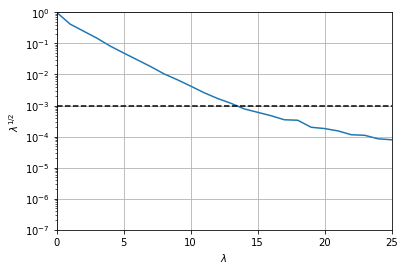

In [486]:
plt.plot(np.sqrt(evals_21cm.T) / np.sqrt(evals_21cm).max())
plt.yscale('log')
plt.ylim(1e-7,1e0)
plt.xlim(0,25)
plt.grid()
plt.xlim()
plt.ylabel('$\\lambda^{1/2}$')
plt.xlabel('$\\lambda$')
plt.axhline(1e-3, ls='--', color='k')

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWar

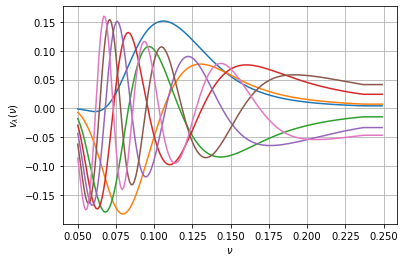

In [487]:
for m in range(7):
    plt.plot(freqs, evecs_21cm.T[m])
#plt.yscale('log')
plt.ylabel('$v_\\lambda(\\nu)$')
plt.xlabel('$\\nu$')
plt.grid()

In [599]:
import healpy as hp
from pygsm import GlobalSkyModel
mygsm = GlobalSkyModel(freq_unit='GHz')

In [600]:
gsm_fullres = np.asarray([mygsm.generate(f) for f in freqs])

In [601]:
#gsm_fullres = np.load('gsm_fullres.npy')
#import healpy as hp
nside=64
gsm_fullres = hp.ud_grade(gsm_fullres, nside_out=nside)
thetas, phis = hp.pix2ang(nside, range(gsm_fullres.shape[1]))


In [627]:
gsm_fullres_wground = copy.deepcopy(gsm_fullres)
gsm_fullres_wground[:, thetas>=np.pi/2.] = 300. 
cov_gsm = np.cov(gsm_fullres_wground)

In [628]:
evals_gsm, evecs_gsm = np.linalg.eig(cov_gsm + 1e-14 * np.trace(cov_gsm)*np.identity(len(freqs)))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


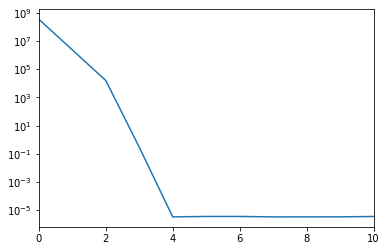

In [629]:
plt.plot(evals_gsm)
plt.xlim(0,10)
plt.yscale('log')

In [640]:
fitmat_gsm = (evecs_gsm.T)[:4].T @ (evecs_gsm.T)[:4]

In [641]:
#rot_gc = hp.Rotator(coord=['G', 'C'])
#rot1 = hp.Rotator(rot=[12*180/24, 0, 0])
#rot2 = hp.Rotator(rot=[0, 30, 0])
#gsm_fullres = rot1.rotate_map_pixel(rot2.rotate_map_pixel(rot_gc.rotate_map_pixel(gsm_fullres)))
 #after rotating, project onto the original spectral eigenvectors to get rid of healpy rotation artifacts.
#gsm_fullres = (fitmat_gsm @ np.array(gsm_fullres))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

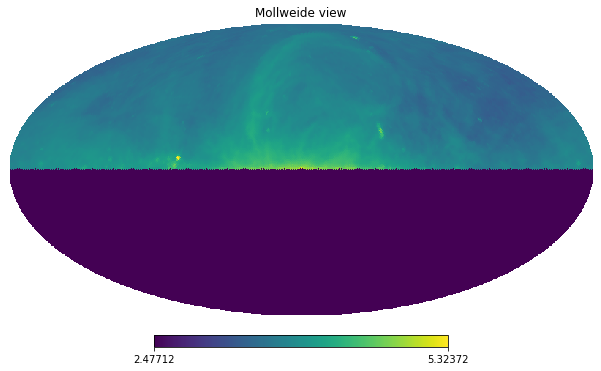

In [642]:
hp.mollview(np.log10(gsm_fullres_wground[0]))

In [643]:
#np.save('gsm_fullres.npy', gsm_fullres)

In [644]:
# see what additional spectral modes downsampling introduces.
#gsm_downres = hp.ud_grade(gsm_fullres, nside_out=16)

In [645]:
#gsm_downres=np.asarray(gsm_downres)
#gsm_cov_downres=np.cov(gsm_downres)


In [646]:
#evals_gsmdr, evecs_gsmdr = np.linalg.eig(gsm_cov_downres+1e-14*np.trace(gsm_cov_downres)*np.identity(len(freqs)))

In [647]:
#plt.plot(np.sqrt(evals_gsmdr/evals_gsmdr.max()))
#plt.yscale('log')
#plt.xlim(0,10)

In [648]:
import scipy.special as sp

In [649]:
np.outer(np.ones(200), np.ones(100)).shape

(200, 100)

In [694]:
D = 1.
C =3e8
x = np.outer(D * np.pi * freqs * 1e9 / C, np.sin(thetas)) 
beamcube = (2 * sp.jn(1, x) / x) ** 2.
# use a half wave dipole
#tg, fg = np.meshgrid(thetas, freqs)
#kd = 2 * np.pi * D  * fg * 1e9 / C
#del fg
#beamcube = np.abs((np.cos(kd * np.cos(tg) /2) - np.cos(kd/2)) / np.sin(tg)) ** 2.
beamcube[~np.isfinite(beamcube)] = 1.
del x

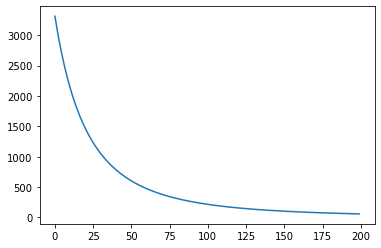

In [695]:
plt.plot(gsm_fullres[:,0])

In [696]:
beamcube_achr = beamcube[100]

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 5.0)

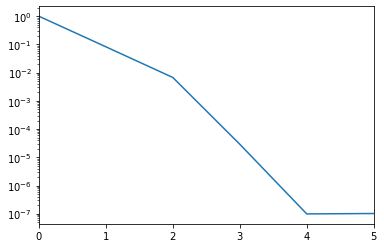

In [697]:
plt.plot(np.sqrt(evals_gsm/evals_gsm.max()))
plt.yscale('log')
plt.xlim(0,5)

In [698]:
cov_gsm_beam = np.cov(gsm_fullres_wground * beamcube)
evals_gsmb, evecs_gsmb = np.linalg.eig(cov_gsm_beam + np.identity(len(freqs)) * np.trace(cov_gsm_beam) * 1e-16)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1e-07, 1.0)

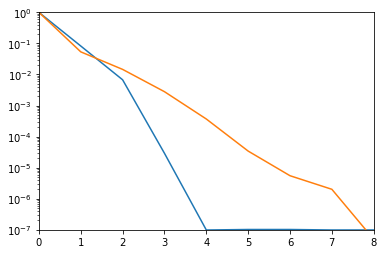

In [699]:
plt.plot(np.sqrt(evals_gsm/evals_gsm.max()))
plt.plot(np.sqrt(evals_gsmb/evals_gsmb.max()))

plt.yscale('log')
plt.xlim(0,8)
plt.ylim(1e-7,1e0)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.01, 1.0)

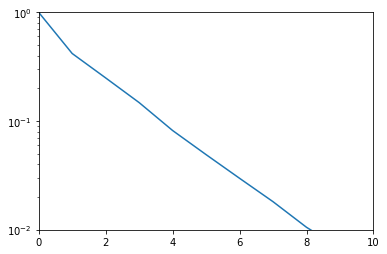

In [700]:
plt.plot(np.sqrt(evals_21cm/evals_21cm.max()))
plt.yscale('log')
plt.xlim(0,10)
plt.ylim(1e-2,1e0)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

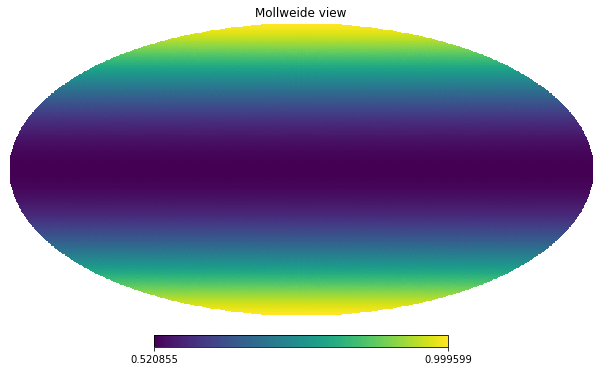

In [701]:
hp.mollview(beamcube[100])

Generate an inverse covariance weighted sky spectrum

In [702]:
#from tqdm import tqdm

In [703]:
lsts = np.arange(0,360, 60)
wghts_a = 0.
wghts = 0.
spectrum_a = np.zeros_like(freqs)
spectrum = np.zeros_like(spectrum_a)
for lst in lsts:
    print(lst)
    rot_gc = hp.Rotator(coord=['G', 'C'])
    rot_lat = hp.Rotator(rot=[0, 30, 0])
    rot_lst = hp.Rotator(rot=[lst, 0, 0])
    gsm_obs = copy.deepcopy(gsm_fullres)
    gsm_obs = np.asarray(rot_lat.rotate_map_pixel(rot_lst.rotate_map_pixel(rot_gc.rotate_map_pixel(gsm_obs))))
    gsm_obs[:, thetas>=np.pi/2.] = 300.# set below hrzn to 300 K. 
    gsm_obs =  fitmat_gsm @ gsm_obs # project out healpy rotation effects
    spectrum_a += np.real(np.mean(gsm_obs * beamcube_achr , axis=1) / np.mean((gsm_obs * beamcube_achr) ** 2.))
    wghts_a += 1 / np.real(np.mean((gsm_obs * beamcube_achr) ** 2.))
    spectrum += np.real(np.mean(gsm_obs * beamcube , axis=1) / np.mean((gsm_obs * beamcube) ** 2.))
    wghts += 1 / np.real(np.mean((gsm_obs * beamcube) ** 2.))  
spectrum = spectrum / wghts
spectrum_a = spectrum_a  / wghts_a

0
60
120
180
240
300


/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


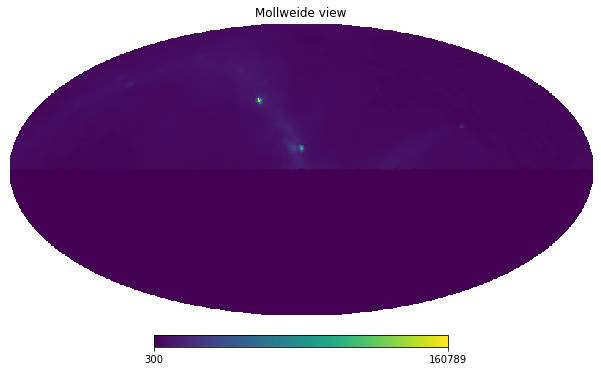

In [704]:
hp.mollview(gsm_obs[0])

In [705]:
spectrum_a

array([1914.04698466, 1829.79698063, 1750.93617553, 1677.02730976,
       1607.67587936, 1542.525271  , 1481.25251486, 1423.56459235,
       1369.19519844, 1317.90189596, 1269.46362604, 1223.67851146,
       1180.36190715, 1139.34468934, 1100.47173112, 1063.60054824,
       1028.60010064,  995.3497123 ,  963.73811915,  933.66260698,
        905.02824851,  877.74720924,  851.73813023,  826.92556761,
        803.23949288,  780.61483536,  758.99107441,  738.31186361,
        718.52469881,  699.58060577,  681.4338668 ,  664.04176594,
        647.36435724,  631.36425704,  616.0064478 ,  601.2581062 ,
        587.08844095,  573.46854357,  560.37125687,  547.77104795,
        535.64389585,  523.96718602,  512.71961419,  501.88109714,
        491.43269015,  481.35651303,  471.63567833,  462.25422719,
        453.19707006,  444.44993033,  435.99929343,  427.83235919,
        419.93699762,  412.30170753,  404.9155779 ,  397.76825358,
        390.84990061,  384.15117651,  377.66320105,  371.37752

In [758]:
NFG = 4 #number of foreground modes to fit
NBM = 4 # number of beam modes to fit
N21 = 7 # number of 21cm modes to fit
model_index = 460#499#587#278#460#640#460#260#250#460#640 THIS IS SUPER CHERRY PICKED!!!!
obstime = 400 * 3600
NOBS = 1000
full_temp =  spectrum_a + dTb.T[model_index]*1e-3
full_temp_chr = spectrum  + dTb.T[model_index]*1e-3

noise_level = (full_temp + 100) / np.sqrt(2 * obstime * 1e9 * np.mean(np.diff(freqs))) 
Amat = np.vstack([evecs_gsm.T[:NFG], evecs_21cm.T[:N21]])
print (np.linalg.cond((Amat @ Amat.T)))
fitMat = Amat.T[:, NFG:] @ (np.linalg.inv(Amat @ np.diag(1/noise_level) @ Amat.T) @ Amat @ np.diag(1/noise_level))[NFG:]
Amat_bm = np.vstack([evecs_gsmb.T[:NFG+NBM], evecs_21cm.T[:N21]])
print ('%e'%np.linalg.cond((Amat_bm @ Amat_bm.T)))

fitMat_bm = Amat_bm.T[:, NFG + NBM:] @ (np.linalg.inv(Amat_bm @ np.diag(1/noise_level) @ Amat_bm.T) @ Amat_bm @ np.diag(1/noise_level))[NFG + NBM:]


14288.681505690553
3.496443e+07


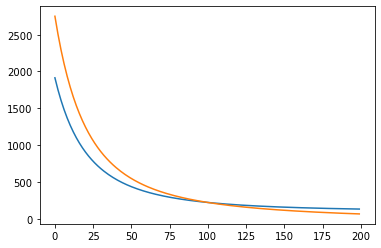

In [759]:
plt.plot(full_temp)
plt.plot(full_temp_chr)

In [760]:

measurements = []
measurements_chr = []
measurements_mod = []
for obsnum in range(NOBS):
    noise = np.random.randn(len(freqs)) * noise_level
    measurement = full_temp + noise
    measurements.append(fitMat @ measurement)
    measurement = full_temp_chr + noise
    measurements_chr.append(fitMat @ measurement)
    measurements_mod.append(fitMat_bm @ measurement)
    
measurements = np.asarray(measurements)
measurements_chr = np.asarray(measurements_chr)
measurements_mod = np.asarray(measurements_mod)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


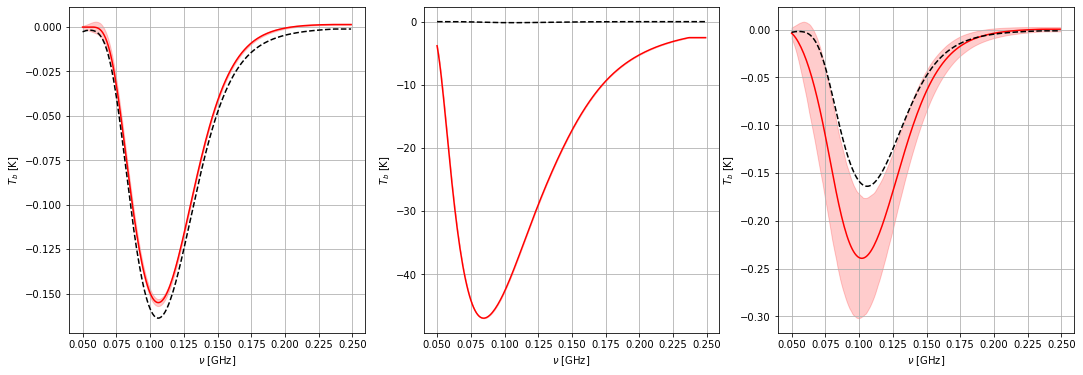

In [761]:
#plt.plot(freqs, full_temp, color='r', ls='--')
#for measurement in measurements:
#    plt.plot(freqs, measurement.real, ls='-', color='grey', alpha=0.01)

fig, axarr = plt.subplots(1,3)
plt.sca(axarr[0])
mmts = measurements
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, 84) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, 16) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[1])
mmts = measurements_chr
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, 84) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, 16) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[2])
mmts = measurements_mod
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, 84) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, 16) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()


plt.gcf().set_size_inches(18,6)

Try doing multile times.

$V(\nu) = \sum a_{fg} v_{fg}(\nu) + \sum a_{21} v_{21}(\nu)$